In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4f/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.987293,0.000000,0.000000,0.000000,0.000000,0.000000,1.561414,0.000000,0.333333,...,0,27,0.333333,0.000000,0,,0,,0.500000,YES
1,0.000000,1.686665,0.000000,0.000000,0.000000,0.000000,0.000000,2.706102,0.000583,0.504683,...,0,27,1.000000,0.000000,0,,0,,0.333333,NO
2,0.999996,1.961847,2.177694,3.867700,0.006142,0.465936,0.078281,4.375355,0.001715,0.802840,...,1,24,0.800000,0.201880,0,,0,,0.250000,UNKNOWN
3,0.000000,2.096811,0.000000,0.000000,0.000000,0.000000,0.000000,4.503376,0.000000,1.000000,...,0,38,1.000000,0.000000,0,,0,,0.333333,YES
4,0.999966,1.949269,2.192006,3.937175,0.005018,0.381601,0.103429,3.631440,0.000719,0.676320,...,1,13,0.600000,0.361016,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,1.899769,1.805037,3.849615,0.003770,0.329502,0.101549,3.587219,0.000579,0.665900,...,1,16,0.200000,0.187846,0,,0,,0.500000,UNKNOWN
796,0.000000,1.995458,0.000000,0.000000,0.000000,0.000000,0.000000,4.165892,0.000000,0.888889,...,0,23,1.000000,0.000000,0,,0,,0.666667,YES
797,0.000000,1.491480,0.000000,0.000000,0.000000,0.000000,0.000000,3.157142,0.000000,0.666667,...,0,19,0.333333,0.000000,0,,0,,0.500000,UNKNOWN
798,0.000000,1.666819,0.000000,0.000000,0.000000,0.000000,0.000000,3.808481,0.000000,0.800000,...,0,22,0.400000,0.000000,0,,0,,1.000000,NO


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

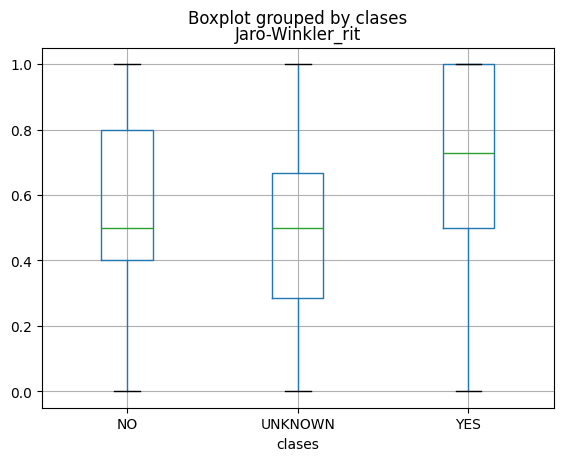

In [4]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.987293,0.000000,0.000000,0.000000,0.000000,0.000000,1.561414,0.000000,0.333333,...,0,27,0.333333,0.000000,0,,0,,0.500000,YES
1,0.000000,1.686665,0.000000,0.000000,0.000000,0.000000,0.000000,2.706102,0.000583,0.504683,...,0,27,1.000000,0.000000,0,,0,,0.333333,NO
2,0.999996,1.961847,2.177694,3.867700,0.006142,0.465936,0.078281,4.375355,0.001715,0.802840,...,1,24,0.800000,0.201880,0,,0,,0.250000,UNKNOWN
3,0.000000,2.096811,0.000000,0.000000,0.000000,0.000000,0.000000,4.503376,0.000000,1.000000,...,0,38,1.000000,0.000000,0,,0,,0.333333,YES
4,0.999966,1.949269,2.192006,3.937175,0.005018,0.381601,0.103429,3.631440,0.000719,0.676320,...,1,13,0.600000,0.361016,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,1.899769,1.805037,3.849615,0.003770,0.329502,0.101549,3.587219,0.000579,0.665900,...,1,16,0.200000,0.187846,0,,0,,0.500000,UNKNOWN
796,0.000000,1.995458,0.000000,0.000000,0.000000,0.000000,0.000000,4.165892,0.000000,0.888889,...,0,23,1.000000,0.000000,0,,0,,0.666667,YES
797,0.000000,1.491480,0.000000,0.000000,0.000000,0.000000,0.000000,3.157142,0.000000,0.666667,...,0,19,0.333333,0.000000,0,,0,,0.500000,UNKNOWN
798,0.000000,1.666819,0.000000,0.000000,0.000000,0.000000,0.000000,3.808481,0.000000,0.800000,...,0,22,0.400000,0.000000,0,,0,,1.000000,NO


In [6]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'verbT', 'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [7]:
train["mutinf"]=train["mutinf"]/train["mutinf_t"]
train["max_info"]=train["max_info"]/train["max_info_t"]
train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropias"]=train["entropias"]/train["entropia_total"]
train["sumas"]=train["sumas"]/train["sumas_t"]
train["list_m"]=train["list_m"]/train["list_M"]
train=train.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
                  "mearts_t","sumas_t","list_M"],axis=1)

In [8]:
train["mearts"]=train["mearts"]*train["distancias"]
train=train.drop(["distancias","list_incomp","negH","max_info"],axis=1)

In [9]:
#train = train[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]

In [10]:
train

,entropias,mutinf,mearts,sumas,list_comp,diferencias,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,overlap_ent,clases
0,0.000000,0.000000,NaN,0.000000,0,0.000000,0.000000,0.0,27,0.333333,0,0.500000,YES
1,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.0,27,1.000000,0,0.333333,NO
2,2.177694,0.883974,3.582326,1.394424,1,0.041667,0.721928,0.2,24,0.800000,0,0.250000,UNKNOWN
3,0.000000,0.000000,NaN,0.000000,0,0.000000,0.000000,0.0,38,1.000000,0,0.333333,YES
4,2.192006,1.084191,6.980782,1.012474,0,0.076923,0.721928,0.2,13,0.600000,0,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.805037,1.073148,6.513974,1.015625,0,0.062500,0.721928,0.2,16,0.200000,0,0.500000,UNKNOWN
796,0.000000,0.000000,NaN,0.000000,0,0.000000,0.000000,0.0,23,1.000000,0,0.666667,YES
797,0.000000,0.000000,NaN,0.000000,0,0.000000,0.000000,0.0,19,0.333333,0,0.500000,UNKNOWN
798,0.000000,0.000000,NaN,0.000000,0,0.000000,0.000000,0.0,22,0.400000,0,1.000000,NO


In [11]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [12]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [13]:
train_m

,entropias,mutinf,mearts,sumas,list_comp,diferencias,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,overlap_ent
entropias,1.000000,0.917146,0.458858,0.851779,0.043594,0.519442,0.862515,0.708909,-0.059638,-0.371454,-0.012635,-0.307475
mutinf,0.917146,1.000000,0.505537,0.854162,0.049300,0.499856,0.844280,0.710106,-0.054171,-0.372231,-0.024059,-0.326603
mearts,0.458858,0.505537,1.000000,0.252045,-0.453898,-0.066940,0.233286,-0.053834,0.057614,0.081904,-0.021813,0.208995
sumas,0.851779,0.854162,0.252045,1.000000,0.060095,0.441820,0.717792,0.631419,-0.039317,-0.352787,-0.008946,-0.308356
list_comp,0.043594,0.049300,-0.453898,0.060095,1.000000,0.171575,0.077005,0.051449,-0.084659,-0.112246,0.018050,-0.301034
diferencias,0.519442,0.499856,-0.066940,0.441820,0.171575,1.000000,0.616006,0.766001,-0.314160,-0.397905,-0.057687,-0.329840
entropia_relaciones,0.862515,0.844280,0.233286,0.717792,0.077005,0.616006,1.000000,0.830144,-0.069302,-0.436760,-0.060590,-0.366210
list_m,0.708909,0.710106,-0.053834,0.631419,0.051449,0.766001,0.830144,1.000000,-0.067733,-0.507722,-0.042378,-0.439070
list_T,-0.059638,-0.054171,0.057614,-0.039317,-0.084659,-0.314160,-0.069302,-0.067733,1.000000,0.117317,0.116091,0.040719
Jaro-Winkler_rit,-0.371454,-0.372231,0.081904,-0.352787,-0.112246,-0.397905,-0.436760,-0.507722,0.117317,1.000000,0.040509,0.309787


<Axes: >

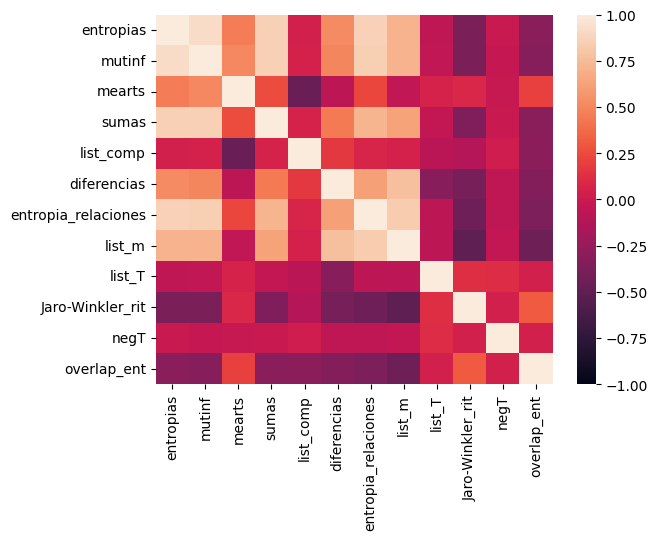

In [14]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [15]:
train_m

,entropias,mutinf,mearts,sumas,list_comp,diferencias,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,overlap_ent
entropias,1.000000,0.917146,0.458858,0.851779,0.043594,0.519442,0.862515,0.708909,-0.059638,-0.371454,-0.012635,-0.307475
mutinf,0.917146,1.000000,0.505537,0.854162,0.049300,0.499856,0.844280,0.710106,-0.054171,-0.372231,-0.024059,-0.326603
mearts,0.458858,0.505537,1.000000,0.252045,-0.453898,-0.066940,0.233286,-0.053834,0.057614,0.081904,-0.021813,0.208995
sumas,0.851779,0.854162,0.252045,1.000000,0.060095,0.441820,0.717792,0.631419,-0.039317,-0.352787,-0.008946,-0.308356
list_comp,0.043594,0.049300,-0.453898,0.060095,1.000000,0.171575,0.077005,0.051449,-0.084659,-0.112246,0.018050,-0.301034
diferencias,0.519442,0.499856,-0.066940,0.441820,0.171575,1.000000,0.616006,0.766001,-0.314160,-0.397905,-0.057687,-0.329840
entropia_relaciones,0.862515,0.844280,0.233286,0.717792,0.077005,0.616006,1.000000,0.830144,-0.069302,-0.436760,-0.060590,-0.366210
list_m,0.708909,0.710106,-0.053834,0.631419,0.051449,0.766001,0.830144,1.000000,-0.067733,-0.507722,-0.042378,-0.439070
list_T,-0.059638,-0.054171,0.057614,-0.039317,-0.084659,-0.314160,-0.069302,-0.067733,1.000000,0.117317,0.116091,0.040719
Jaro-Winkler_rit,-0.371454,-0.372231,0.081904,-0.352787,-0.112246,-0.397905,-0.436760,-0.507722,0.117317,1.000000,0.040509,0.309787


In [16]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [17]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [18]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

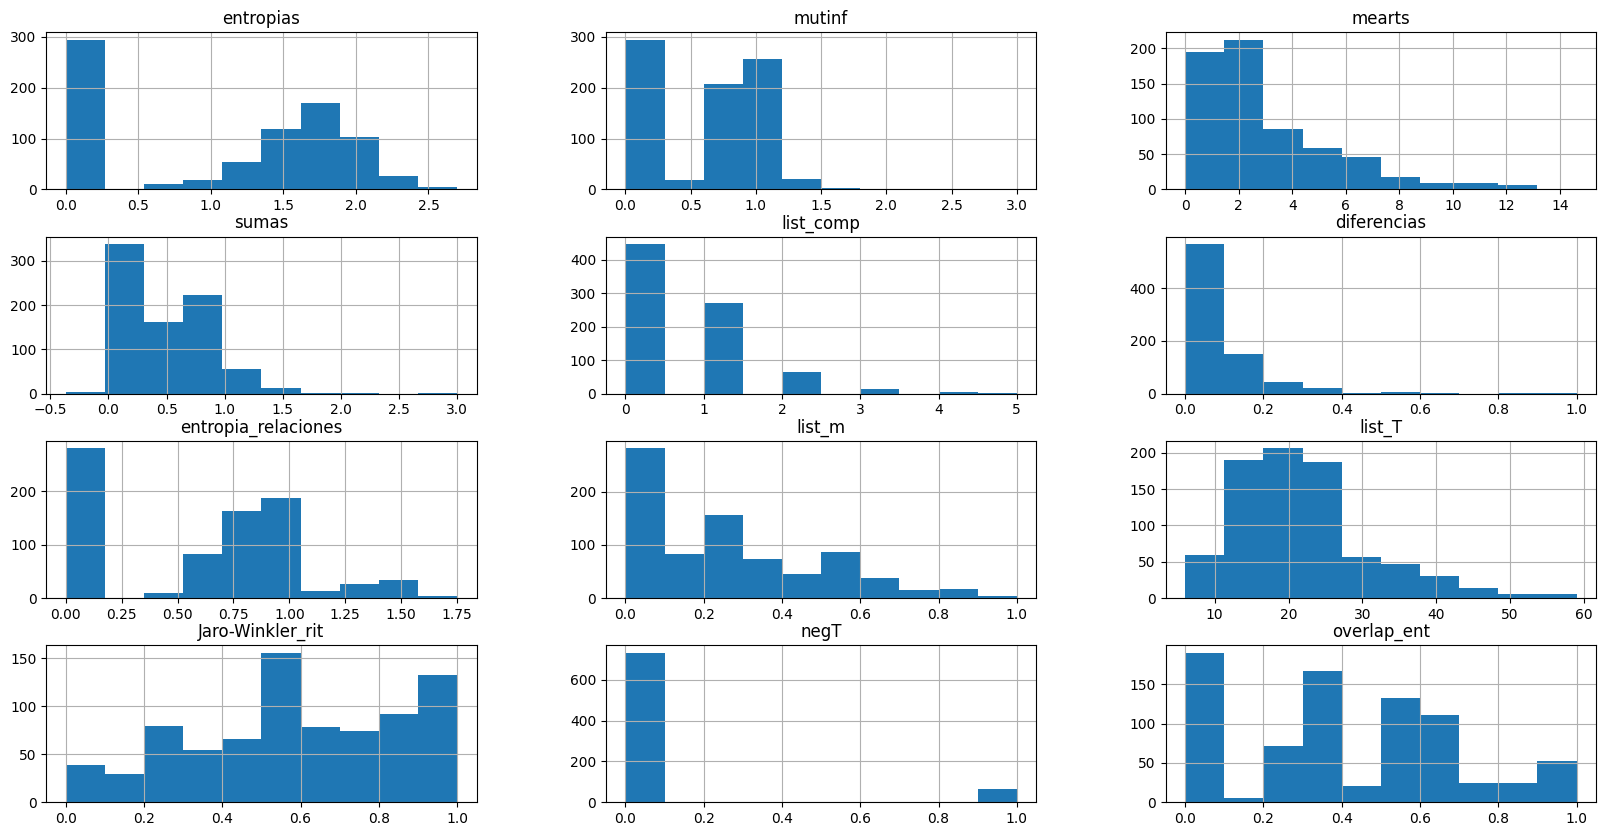

In [19]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [20]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4f/GHS/GHS_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/GHS/GHS_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [21]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,1.949972,0.000000,0.000000,0.000000,0.000000,0.000000,4.427003,0.001455,0.848833,...,0,17,0.800000,0.000000,0,,0,,0.666667,ENTAILMENT
1,1.225259,1.647705,1.701835,3.408460,0.009896,0.180890,0.048718,3.561413,0.007299,0.212383,...,16,9,0.047619,0.012063,0,,0,,0.000000,NONENTAILMENT
2,1.174453,1.718781,1.723976,3.973294,0.004504,0.288740,0.045871,4.088620,0.002853,0.408881,...,9,17,0.307692,0.024359,0,,0,,0.000000,NONENTAILMENT
3,0.000000,1.994809,0.000000,0.000000,0.000000,0.000000,0.000000,3.682101,0.001037,0.701110,...,0,12,0.833333,0.000000,0,,0,,0.000000,ENTAILMENT
4,1.234672,1.787912,1.752654,3.849227,0.004548,0.233145,0.052028,3.888264,0.003238,0.274823,...,17,10,0.173913,0.015685,0,,0,,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.833332,1.568795,1.456336,3.314428,0.003592,0.155089,0.029562,3.514686,0.002271,0.275790,...,18,19,0.142857,0.013654,0,,0,,0.166667,NONENTAILMENT
796,0.999985,1.808203,1.564972,3.935828,0.004631,0.204012,0.025430,4.375612,0.001484,0.683815,...,2,27,0.571429,0.144535,0,,0,,0.250000,ENTAILMENT
797,1.214410,1.709231,1.576721,3.336211,0.009568,0.190885,0.033734,3.469695,0.007532,0.260253,...,15,16,0.111111,0.014223,0,,0,,0.000000,NONENTAILMENT
798,1.118998,1.979139,1.921430,3.582727,0.006588,0.327758,0.050310,3.702921,0.004676,0.402503,...,15,18,0.150000,0.012432,0,,1,do,0.090909,NONENTAILMENT


In [22]:
test["mutinf"]=test["mutinf"]/test["mutinf_t"]
test["max_info"]=test["max_info"]/test["max_info_t"]
test["mearts"]=test["mearts"]/test["mearts_t"]
#test["entropias"]=test["entropias"]/test["entropia_total"]
test["sumas"]=test["sumas"]/test["sumas_t"]
test["list_m"]=test["list_m"]/test["list_M"]
test=test.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
                  "mearts_t","sumas_t","list_M"],axis=1)
#test=test.drop(["verbT","verbH","KL_divergence"],axis=1)
test

,distancias,entropias,mutinf,mearts,max_info,sumas,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,0,0.000000,0.000000,17,0.800000,0,0,0.666667,ENTAILMENT
1,1.225259,1.701835,0.957053,1.355851,0.851715,0.940540,4,1.777778,0,0.791858,0.761905,9,0.047619,0,0,0.000000,NONENTAILMENT
2,1.174453,1.723976,0.971793,1.578560,0.706172,0.850321,2,0.529412,0,1.238901,0.692308,17,0.307692,0,0,0.000000,NONENTAILMENT
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,0,0.000000,0.000000,12,0.833333,0,0,0.000000,ENTAILMENT
4,1.234672,1.752654,0.989960,1.404768,0.848346,0.862827,5,1.700000,0,1.066615,0.739130,10,0.173913,0,0,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.833332,1.456336,0.943022,1.581799,0.562343,0.729461,0,0.947368,0,0.856996,0.857143,19,0.142857,0,0,0.166667,NONENTAILMENT
796,0.999985,1.564972,0.899492,3.120372,0.298344,0.363516,1,0.074074,0,0.863121,0.285714,27,0.571429,0,0,0.250000,ENTAILMENT
797,1.214410,1.576721,0.961529,1.270267,0.733460,0.786305,2,0.937500,0,0.944489,0.833333,16,0.111111,0,0,0.000000,NONENTAILMENT
798,1.118998,1.921430,0.967541,1.409098,0.814300,0.912882,3,0.833333,0,0.811278,0.750000,18,0.150000,0,1,0.090909,NONENTAILMENT


In [23]:
test["mearts"]=test["mearts"]*test["distancias"]
test=test.drop(["distancias","list_incomp","negH","max_info"],axis=1)

In [24]:
#test = test[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]

In [25]:
test

,entropias,mutinf,mearts,sumas,list_comp,diferencias,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,overlap_ent,clases
0,0.000000,0.000000,0.000000,0.000000,2,0.000000,0.000000,0.000000,17,0.800000,0,0.666667,ENTAILMENT
1,1.701835,0.957053,1.661268,0.940540,4,1.777778,0.791858,0.761905,9,0.047619,0,0.000000,NONENTAILMENT
2,1.723976,0.971793,1.853944,0.850321,2,0.529412,1.238901,0.692308,17,0.307692,0,0.000000,NONENTAILMENT
3,0.000000,0.000000,0.000000,0.000000,2,0.000000,0.000000,0.000000,12,0.833333,0,0.000000,ENTAILMENT
4,1.752654,0.989960,1.734428,0.862827,5,1.700000,1.066615,0.739130,10,0.173913,0,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.456336,0.943022,1.318163,0.729461,0,0.947368,0.856996,0.857143,19,0.142857,0,0.166667,NONENTAILMENT
796,1.564972,0.899492,3.120325,0.363516,1,0.074074,0.863121,0.285714,27,0.571429,0,0.250000,ENTAILMENT
797,1.576721,0.961529,1.542624,0.786305,2,0.937500,0.944489,0.833333,16,0.111111,0,0.000000,NONENTAILMENT
798,1.921430,0.967541,1.576778,0.912882,3,0.833333,0.811278,0.750000,18,0.150000,0,0.090909,NONENTAILMENT


In [26]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [27]:
# RTE3
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [28]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [29]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.33333333],
       [0.80744617, 0.29465798, 0.24502246, ..., 0.8       , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.4       , 0.        ,
        1.        ],
       [0.64046162, 0.29169805, 0.20000831, ..., 0.8       , 0.        ,
        0.66666667]])

In [30]:
X_train.shape

(800, 12)

In [31]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [32]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
model.decision_function(X_train)

array([ 7.95569600e-01,  1.24569700e+00,  9.86186714e-01,  1.42079631e+00,
        8.58742160e-01,  1.20125109e+00,  7.61014154e-01, -1.07473403e+00,
        9.62289575e-01, -1.89176302e+00,  2.08025617e-02,  7.57256142e-01,
        1.23133795e+00,  2.78931388e-01, -7.29370066e-01,  8.49968258e-01,
        9.24776025e-02,  4.07836645e-01, -2.20844737e-01,  4.02064196e-01,
        1.19993855e+00, -6.74554105e-01,  6.47228931e-01,  1.17624960e+00,
        9.31625817e-01,  1.47420635e-01,  8.92231785e-01, -9.85958740e-01,
        5.02009135e-01, -1.74804625e-01,  1.13191042e+00,  7.63951607e-01,
        6.87047989e-01,  1.03167620e+00,  5.44899012e-01,  2.64745780e-01,
        1.35156386e+00,  6.08054996e-01,  2.04754929e-01,  1.32947805e+00,
        8.51326728e-01,  3.37382972e-01,  6.84239066e-01,  2.76937613e-01,
       -4.85006360e-01,  6.09559283e-01,  4.56413153e-01,  1.16492353e+00,
        4.26122535e-01,  7.79009648e-01, -4.73417412e-01,  8.14900586e-01,
       -3.71408478e-01,  

In [34]:
labels=train.columns[:-1]
labels

Index(['entropias', 'mutinf', 'mearts', 'sumas', 'list_comp', 'diferencias',
       'entropia_relaciones', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT',
       'overlap_ent'],
      dtype='object')

In [35]:
model.classes_

array([0, 1])

In [36]:
model.coef_[0]

array([ 0.97432319, -0.2827814 ,  0.16330877,  1.40679112, -0.26520094,
       -0.44106231, -1.72645985, -3.23179595,  0.65468079,  0.93401809,
       -0.27081638,  0.71706685])

In [37]:
coeficientes=model.coef_[0]

In [38]:
coeficientes

array([ 0.97432319, -0.2827814 ,  0.16330877,  1.40679112, -0.26520094,
       -0.44106231, -1.72645985, -3.23179595,  0.65468079,  0.93401809,
       -0.27081638,  0.71706685])

In [39]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  3 sumas 7 list_m


In [40]:
n_columns=train.shape[1]-1

In [41]:
n_columns

12

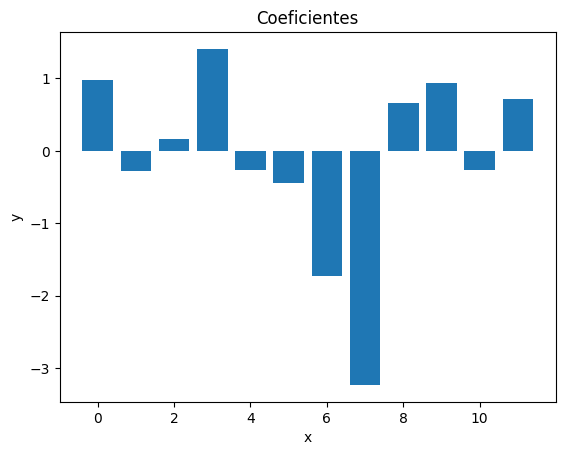

In [42]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [43]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.        , ..., 0.8       , 0.        ,
        0.66666667],
       [0.66937156, 0.58970415, 0.14777543, ..., 0.04761905, 0.        ,
        0.        ],
       [0.67808037, 0.59878692, 0.16491458, ..., 0.30769231, 0.        ,
        0.        ],
       ...,
       [0.62016139, 0.5924621 , 0.13722165, ..., 0.11111111, 0.        ,
        0.        ],
       [0.75574346, 0.59616655, 0.14025971, ..., 0.15      , 0.        ,
        0.09090909],
       [0.75591264, 0.60201762, 0.14426554, ..., 0.33333333, 0.        ,
        0.16666667]])

In [44]:
X_test.shape

(800, 12)

In [45]:
predictions = model.predict(X_test)

In [46]:
predictions

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,

In [47]:
test["predicciones"]=predictions
test

,entropias,mutinf,mearts,sumas,list_comp,diferencias,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,overlap_ent,clases,predicciones
0,0.000000,0.000000,0.000000,0.000000,2,0.000000,0.000000,0.000000,17,0.800000,0,0.666667,ENTAILMENT,1
1,1.701835,0.957053,1.661268,0.940540,4,1.777778,0.791858,0.761905,9,0.047619,0,0.000000,NONENTAILMENT,0
2,1.723976,0.971793,1.853944,0.850321,2,0.529412,1.238901,0.692308,17,0.307692,0,0.000000,NONENTAILMENT,0
3,0.000000,0.000000,0.000000,0.000000,2,0.000000,0.000000,0.000000,12,0.833333,0,0.000000,ENTAILMENT,1
4,1.752654,0.989960,1.734428,0.862827,5,1.700000,1.066615,0.739130,10,0.173913,0,0.000000,NONENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.456336,0.943022,1.318163,0.729461,0,0.947368,0.856996,0.857143,19,0.142857,0,0.166667,NONENTAILMENT,0
796,1.564972,0.899492,3.120325,0.363516,1,0.074074,0.863121,0.285714,27,0.571429,0,0.250000,ENTAILMENT,1
797,1.576721,0.961529,1.542624,0.786305,2,0.937500,0.944489,0.833333,16,0.111111,0,0.000000,NONENTAILMENT,0
798,1.921430,0.967541,1.576778,0.912882,3,0.833333,0.811278,0.750000,18,0.150000,0,0.090909,NONENTAILMENT,0


In [48]:
incorrectos = test[(test["clases"]=="ENTAILMENT") & (test["predicciones"]==0)]
incorrectos

,entropias,mutinf,mearts,sumas,list_comp,diferencias,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,overlap_ent,clases,predicciones
10,2.003658,0.892044,2.490600,0.985824,1,0.090909,1.251629,0.333333,22,0.500000,0,0.000000,ENTAILMENT,0
15,1.723308,0.889529,2.781544,0.700751,0,0.222222,1.000000,0.500000,9,0.500000,0,0.000000,ENTAILMENT,0
16,1.542397,1.037732,2.079062,0.583337,2,0.190476,0.970951,0.400000,21,0.600000,0,0.400000,ENTAILMENT,0
23,1.551511,0.911296,3.341818,0.431984,1,0.142857,0.954434,0.375000,21,0.375000,0,0.333333,ENTAILMENT,0
28,1.916803,0.910073,2.368700,0.941764,1,0.111111,0.970951,0.400000,18,0.600000,0,0.000000,ENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,1.436776,1.137817,2.164514,1.315934,1,0.230769,1.459148,0.500000,13,0.500000,0,0.000000,ENTAILMENT,0
787,1.792785,0.941050,2.232874,0.646894,0,0.133333,0.918296,0.666667,15,0.333333,0,0.000000,ENTAILMENT,0
790,1.843961,1.185480,2.181215,1.005278,0,0.200000,0.970951,0.600000,15,0.400000,0,0.250000,ENTAILMENT,0
793,1.507477,1.257328,2.829822,1.078334,0,0.080000,1.000000,0.500000,25,0.750000,0,0.000000,ENTAILMENT,0


In [49]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[251 148]
 [  8 393]]


In [50]:
# [[221 178]
#  [  2 399]]
# acccuracy:  0.78
# precision:  0.99
# recall 0.55
# f1_score:  0.71
# matthews_score:  0.61

In [51]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.8
precision:  0.97
recall 0.63
f1_score:  0.76
matthews_score:  0.65


In [ ]:
# acccuracy:  0.8
# precision:  0.98
# recall 0.6
# f1_score:  0.75
# matthews_score:  0.64

In [56]:
X_train.shape

(800, 12)

In [57]:
X_test.shape

(800, 12)

In [58]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [59]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [60]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.830000 (0.025000)
Logistic Regression Precision:: 0.810000 (0.056030)
Logistic Regression Recall:: 0.880000 (0.040564)
Logistic Regression F1-score:: 0.840000 (0.019766)


In [ ]:
# Logistic Regression Acurracy:: 0.840000 (0.026553)
# Logistic Regression Precision:: 0.800000 (0.059591)
# Logistic Regression Recall:: 0.900000 (0.027215)
# Logistic Regression F1-score:: 0.850000 (0.021031)

In [142]:
# Logistic Regression Acurracy:: 0.830000 (0.024693)
# Logistic Regression Precision:: 0.800000 (0.034413)
# Logistic Regression Recall:: 0.890000 (0.036496)
# Logistic Regression F1-score:: 0.840000 (0.025444)

In [61]:
kfold = model_selection.KFold(n_splits=10,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')

In [62]:
print(cv_results)
print(round(cv_results.mean(),2))
print(round(cv_results.std(),2))

[0.8125  0.83125 0.81875 0.85625 0.825   0.79375 0.8875  0.825   0.8
 0.8375 ]
0.83
0.03


In [63]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.840000 (0.144047)
Logistic Regression Recall:: 0.880000 (0.046575)
Logistic Regression F1-score:: 0.850000 (0.085909)


In [64]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.650000 (0.268334)


In [65]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.840000 (0.118059)
Logistic Regression Recall:: 0.830000 (0.124029)
Logistic Regression F1-score:: 0.820000 (0.147768)


In [66]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.830000 (0.124029)
Logistic Regression Recall:: 0.830000 (0.124029)
Logistic Regression F1-score:: 0.830000 (0.124029)


In [67]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.840000 (0.117490)
Logistic Regression Recall:: 0.830000 (0.127421)
Logistic Regression F1-score:: 0.820000 (0.149530)


In [68]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [57]:
#linear_model

In [58]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [69]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))
print(confusion_matrix( y_test,y_predict,labels=[1,0]))

              precision    recall  f1-score   support

           0       0.73      0.98      0.83       401
           1       0.97      0.63      0.76       399

    accuracy                           0.81       800
   macro avg       0.85      0.80      0.80       800
weighted avg       0.85      0.81      0.80       800

[[251 148]
 [  8 393]]


In [70]:
#        precision    recall  f1-score   support

#            0       0.72      0.99      0.83       401
#            1       0.98      0.60      0.75       399

#     accuracy                           0.80       800
#    macro avg       0.85      0.80      0.79       800
# weighted avg       0.85      0.80      0.79       800

# [[241 158]
#  [  4 397]]

In [71]:
#              precision    recall  f1-score   support

#            0       0.69      1.00      0.82       401
#            1       0.99      0.55      0.71       399

#     accuracy                           0.78       800
#    macro avg       0.84      0.77      0.76       800
# weighted avg       0.84      0.78      0.76       800

# [[221 178]
#  [  2 399]]

In [72]:
# precision    recall  f1-score   support

#            0       0.70      0.99      0.82       401
#            1       0.98      0.57      0.72       399

#     accuracy                           0.78       800
#    macro avg       0.84      0.78      0.77       800
# weighted avg       0.84      0.78      0.77       800

# [[229 170]
#  [  4 397]]

In [73]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [74]:
test.columns[:-2]

Index(['entropias', 'mutinf', 'mearts', 'sumas', 'list_comp', 'diferencias',
       'entropia_relaciones', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT',
       'overlap_ent'],
      dtype='object')

In [75]:
explainer.expected_value

-0.1584757108179369

In [76]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.8       , 0.        ,
        0.66666667],
       [0.66937156, 0.58970415, 0.14777543, ..., 0.04761905, 0.        ,
        0.        ],
       [0.67808037, 0.59878692, 0.16491458, ..., 0.30769231, 0.        ,
        0.        ],
       ...,
       [0.62016139, 0.5924621 , 0.13722165, ..., 0.11111111, 0.        ,
        0.        ],
       [0.75574346, 0.59616655, 0.14025971, ..., 0.15      , 0.        ,
        0.09090909],
       [0.75591264, 0.60201762, 0.14426554, ..., 0.33333333, 0.        ,
        0.16666667]])

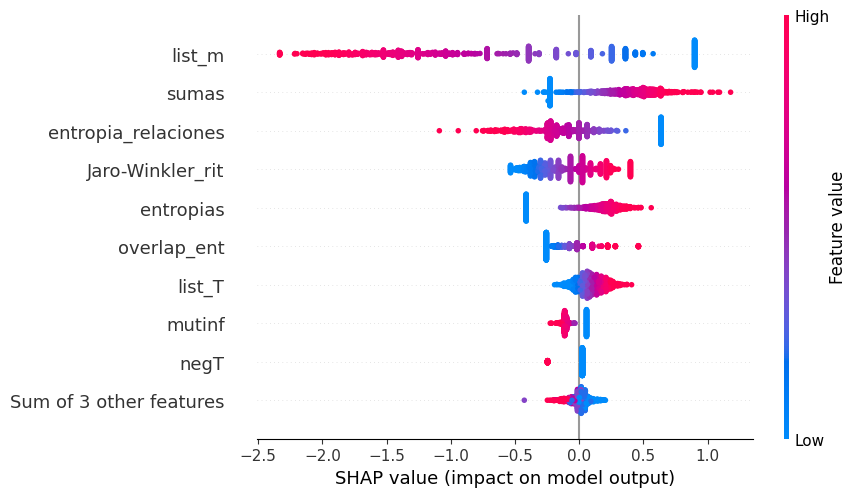

In [77]:
shap.plots.beeswarm(shap_values)

[0.68081791 0.59955345 0.15516437 0.52520987 0.22222222 0.10227273
 0.57513784 0.75       0.44444444 0.375      1.         0.07692308] 0 0


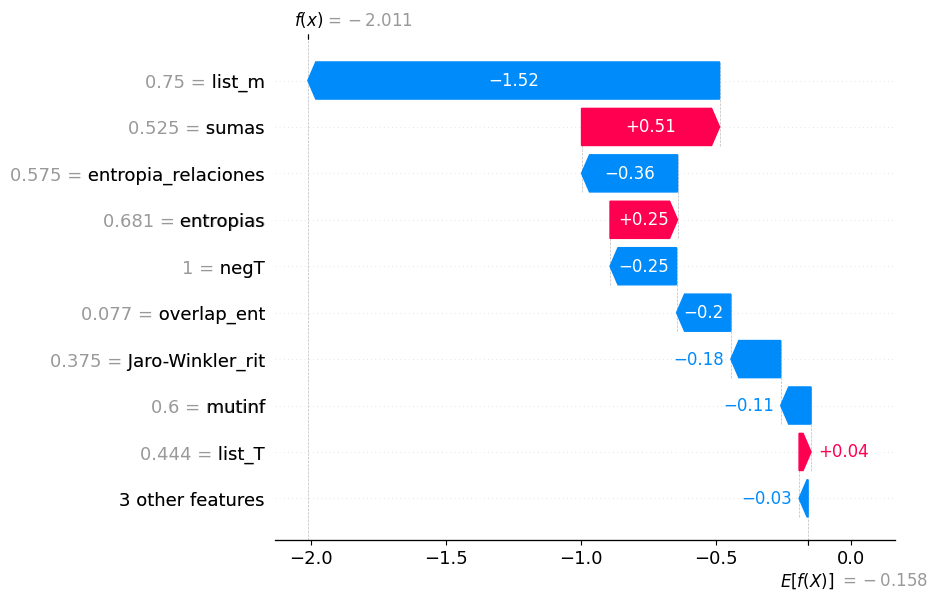

In [78]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [79]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.54302209 0.60474253 0.17500186 0.42002116 0.22222222 0.03409091
 0.74290159 0.57142857 0.44444444 0.57142857 0.         0.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

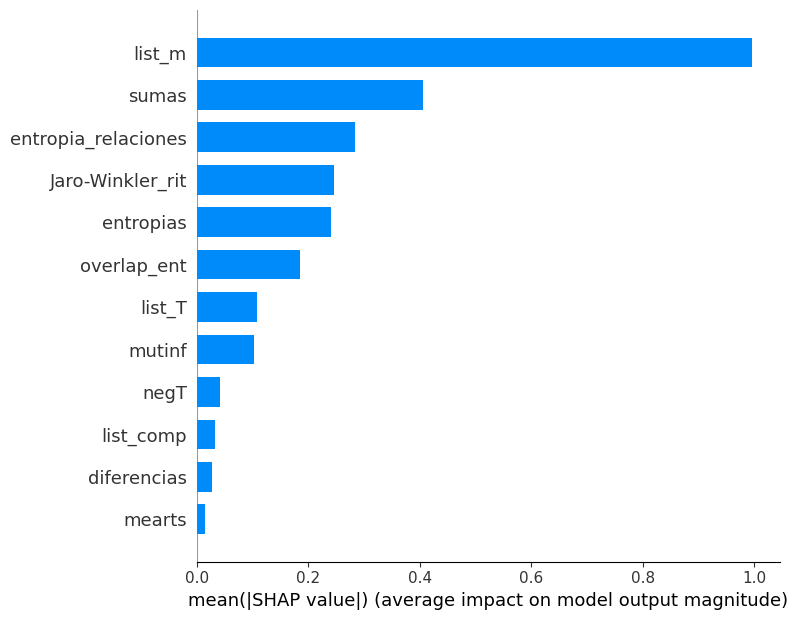

In [80]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

In [ ]:
['sumas', 'distancias', 'entropia_total', 'mutinf','mearts', 'max_info',  'diferencias', 'list_M', 'list_m', 'Jaro-Winkler_rit','overlap_ent']

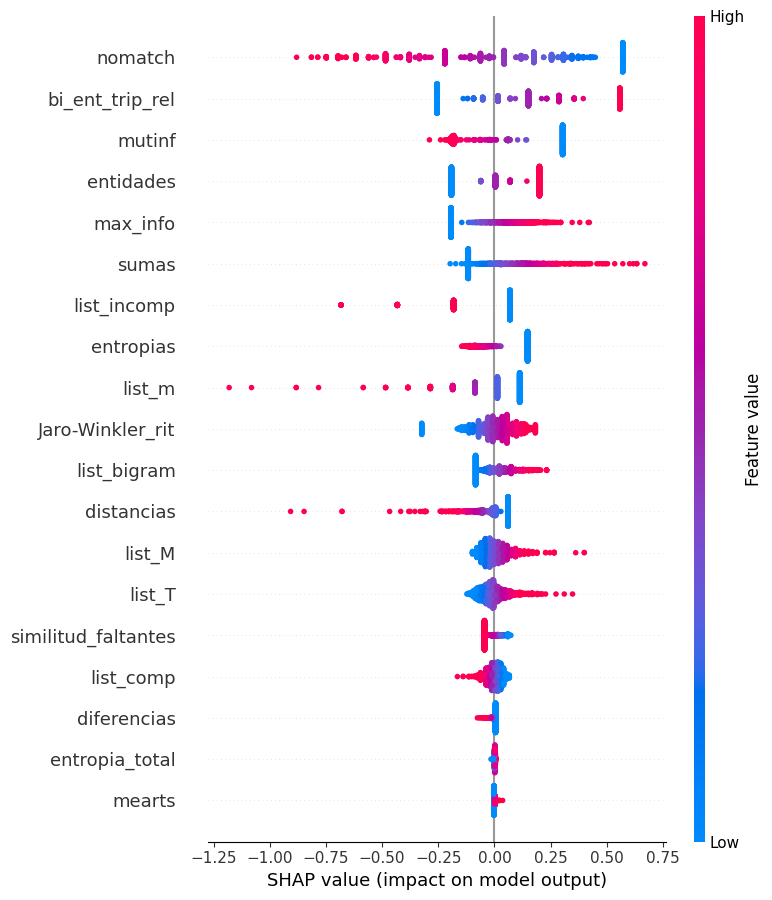

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

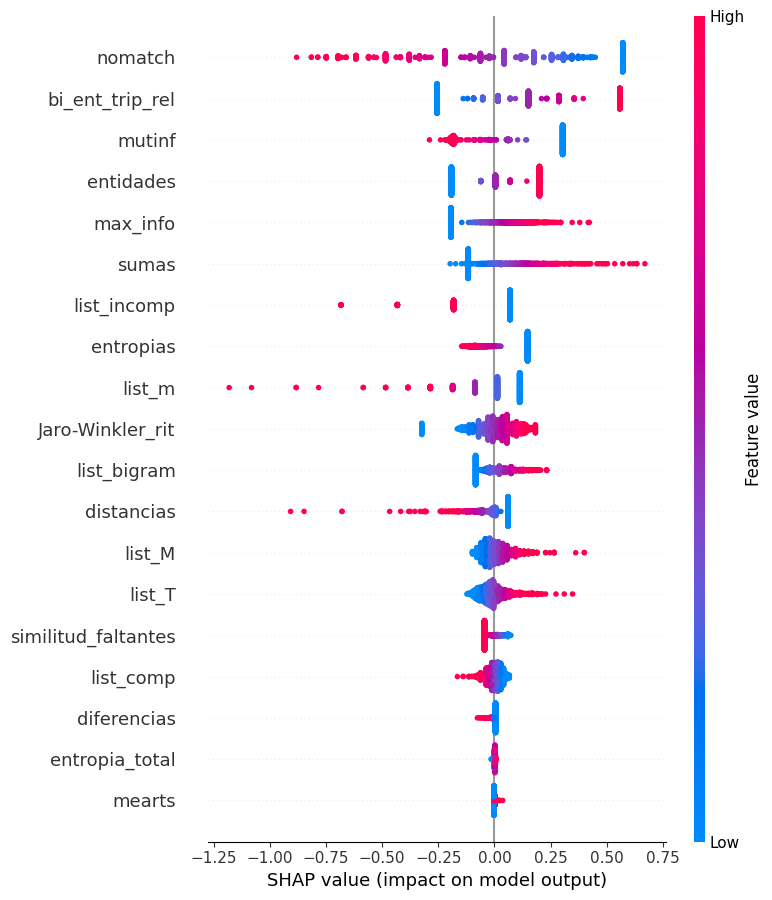

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

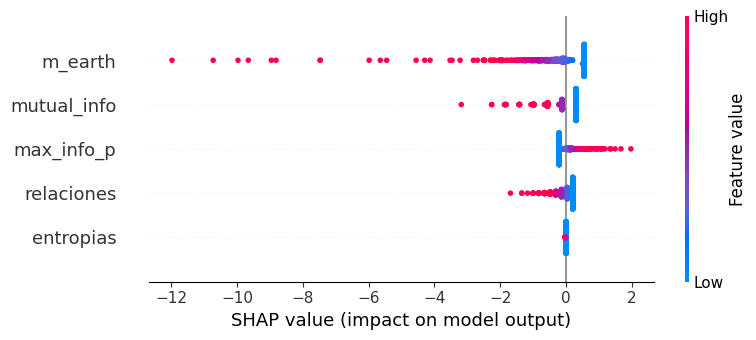

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [448]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [449]:
y_train.count(1)

412

In [450]:
y_train.count(0)

388

In [451]:
# y_trainC=[]
# for j in range(len(y_train)):
#     if y_train[j]==1:
#         y_trainC.append("entailment")
#     else:
#         y_trainC.append("not_entailment")

In [452]:
print(len(y_train))
print(len(y_trainC))

800
800


In [453]:
y_trainC.count("not_entailment")

388

In [454]:
y_train.count(0)

388

In [455]:
# y_testC=[]
# for j in range(len(y_test)):
#     if y_test[j]==1:
#         y_testC.append("entailment")
#     else:
#         y_testC.append("not_entailment")

In [456]:
print(len(y_test))
print(len(y_testC))

800
800


In [457]:
y_testC.count("not_entailment")

401

In [458]:
y_test.count(0)

401

In [459]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [460]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [461]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))# 
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.72
precision:  0.79
recall 0.58
f1_score:  0.67
matthews_score:  0.45


In [462]:
validation_size = 0.10
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [463]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.790000 (0.039461)
DecisionTree: 0.790000 (0.061346)
DecisionTree: 0.820000 (0.053830)
DecisionTree: 0.810000 (0.036024)


In [464]:
print(cv_results)

[0.82926829 0.82352941 0.74647887 0.81818182 0.78911565 0.81889764
 0.76623377 0.81538462 0.85185185 0.875     ]


In [465]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[340,  61],
       [166, 233]])

In [466]:
c

Index(['distancias', 'mutinf', 'max_info', 'diferencias', 'Jaro-Winkler_rit',
       'overlap_ent'],
      dtype='object')

In [467]:
from sklearn import tree

In [468]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.26
|   |--- feature_0 <= 0.01
|   |   |--- feature_4 <= 0.30
|   |   |   |--- feature_4 <= 0.16
|   |   |   |   |--- feature_5 <= 0.98
|   |   |   |   |   |--- feature_5 <= 0.42
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  0.42
|   |   |   |   |   |   |--- feature_5 <= 0.57
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  0.57
|   |   |   |   |   |   |   |--- feature_5 <= 0.76
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  0.76
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  0.98
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.16
|   |   |   |   |--- feature_5 <= 0.46
|   |   |   |   |   |--- feature_4 <= 0.21
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  0.21
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.46
|   |   |   |   |   |--- feature_4 <= 0.24


Profundidad del árbol: 17
Número de nodos terminales: 267


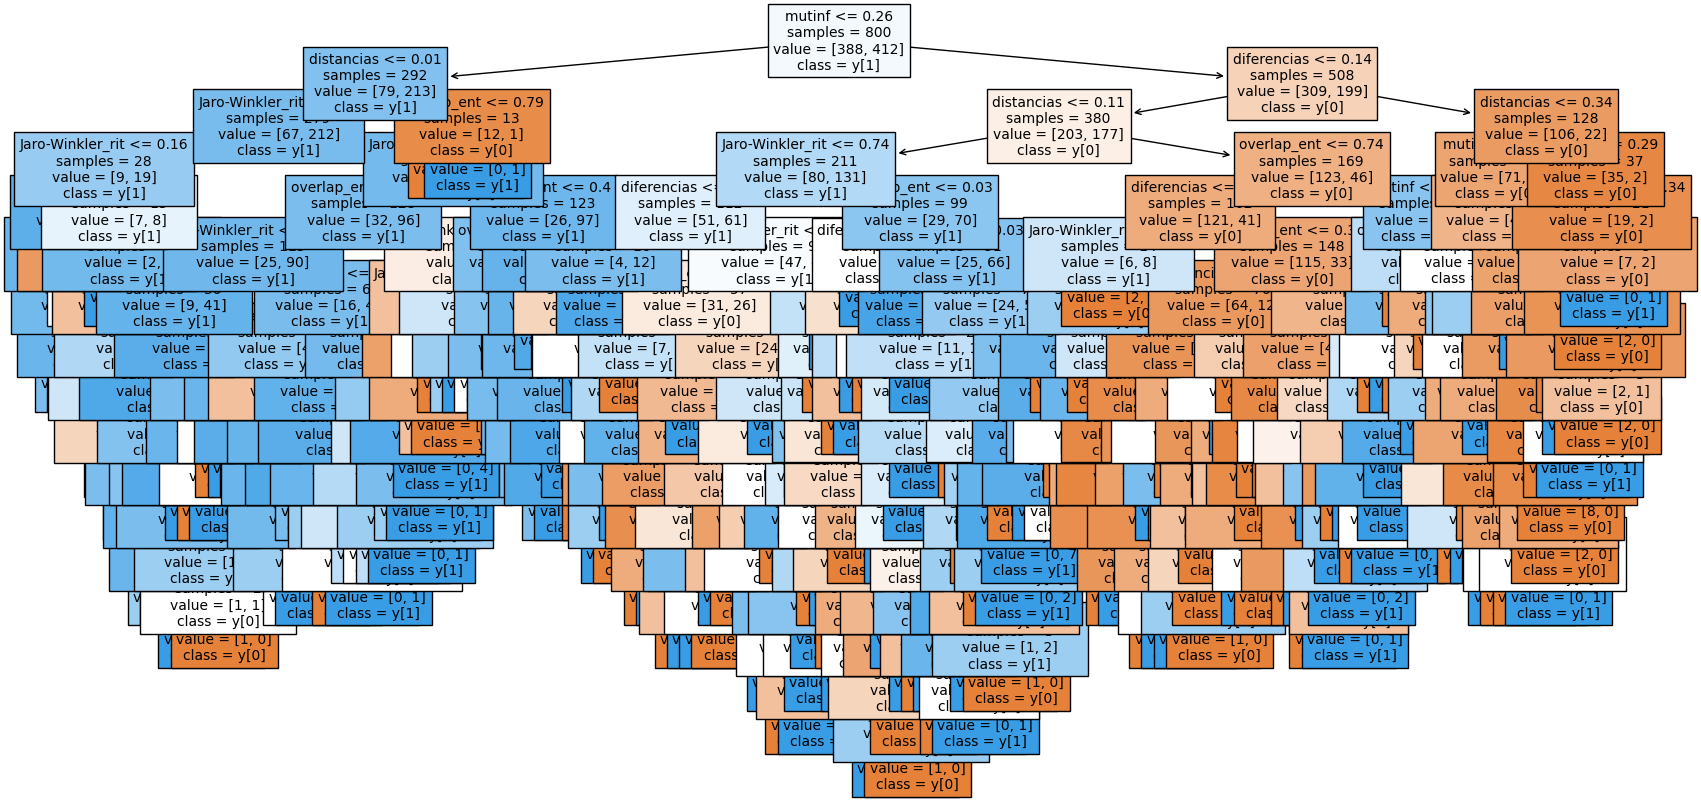

In [469]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )